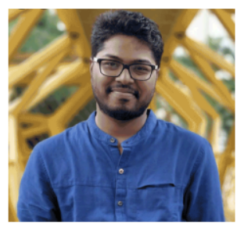

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
original_image = cv2.imread("3.png")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

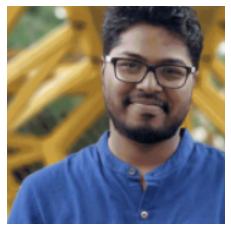

In [2]:
y=20
x=20
h=220
w=220
crop_image = original_image[x:w, y:h]
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [3]:
#the ready made one
# grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml') 
# detected_faces = face_cascade.detectMultiScale(grayscale_image)
# for (column, row, width, height) in detected_faces:
#     cv2.rectangle(original_image,(column, row),(column + width, row + height),(0, 255, 0),4)    
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08

integral image (left and above in the Original Image)

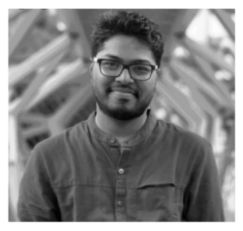

In [4]:
gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [5]:
print(gray_original_image)
gray_original_image=gray_original_image/255
print(gray_original_image)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 243 217 ... 242 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         0.95294118 0.85098039 ... 0.94901961 1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [6]:
def get_integralimage (img): 
    height,width=img.shape
    integral_image= np.zeros((height+1,width+1))#to add maargin 0 on top and on right
    for i in range(height):
        for j in range(width):
            integral_image[i][j]=img[i][j]+integral_image[i-1][j]+integral_image[i][j-1]-integral_image[i-1][j-1]#because we add the right top pixcel twice
    return integral_image                   

In [7]:
test=np.array([[0.4,0.7,0.9,0.7,0.4,0.5,1.0,0.3],[0.3,1.0,0.5,0.8,0.7,0.4,0.1,0.4],[0.9,0.4,0.1,0.2,0.5,0.8,0.2,0.9],[0.3,0.6,0.8,1.0,0.3,0.7,0.5,0.3],[0.2,0.9,0.1,0.5,0.1,0.4,0.8,0.8],[0.5,0.1,0.3,0.7,0.9,0.6,1.0,0.2],[0.8,0.4,1.0,0.2,0.7,0.3,0.1,0.4],[0.4,0.9,0.6,0.6,0.2,1.0,0.5,0.9]])
integral_image=get_integralimage(test) 
#integral_image=get_integralimage(gray_original_image) 
integral_image=np.delete(integral_image, test.shape[0],0)
integral_image=np.delete(integral_image,test.shape[1],1)    #to remove the margin
print(integral_image)

[[ 0.4  1.1  2.   2.7  3.1  3.6  4.6  4.9]
 [ 0.7  2.4  3.8  5.3  6.4  7.3  8.4  9.1]
 [ 1.6  3.7  5.2  6.9  8.5 10.2 11.5 13.1]
 [ 1.9  4.6  6.9  9.6 11.5 13.9 15.7 17.6]
 [ 2.1  5.7  8.1 11.3 13.3 16.1 18.7 21.4]
 [ 2.6  6.3  9.  12.9 15.8 19.2 22.8 25.7]
 [ 3.4  7.5 11.2 15.3 18.9 22.6 26.3 29.6]
 [ 3.8  8.8 13.1 17.8 21.6 26.3 30.5 34.7]]


 Haar features

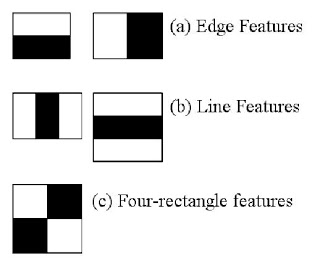

In [8]:
#18.9-7.5-3.1+1.1
#29.6-18.6-4.9+3.1
def get_LeftrightHaarfeatures(integral_image,window_height,window_width):
    LeftrightHaarfeatures=[]
    window_width_half=int(window_width/2)
#    print(integral_image.shape[0],integral_image.shape[1],window_width_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height][j]-integral_image[i][j+window_width_half]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_half]-integral_image[i][j+window_width]+integral_image[i][j+window_width_half]
   #         print(integral_image[i+window_height][j+window_width_half],integral_image[i+window_height][j],integral_image[i][j+window_width_half],integral_image[i][j],white_Pixels_inHaar,integral_image[i+window_height][j+window_width],integral_image[i+window_height][j+window_width_half],integral_image[i][j+window_width],integral_image[i][j+window_width_half],black_Pixels_inHaar)
            delta=(white_Pixels_inHaar-black_Pixels_inHaar)/(window_height*window_width_half)
      #      print(delta)
            LeftrightHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return LeftrightHaarfeatures

In [9]:
LeftrightHaarfeatures=get_LeftrightHaarfeatures(integral_image,6,6)
print(LeftrightHaarfeatures)

[0.02777777777777748, 0.027777777777777284]


In [10]:
def get_topbottomHaarfeatures(integral_image,window_height,window_width):
    LeftrightHaarfeatures=[]
    window_height_half=int(window_height/2)
#    print(integral_image.shape[0],integral_image.shape[1],window_height_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
     #       print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_half][j+window_width]-integral_image[i+window_height_half][j]-integral_image[i][j+window_width]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j]-integral_image[i+window_height_half][j+window_width]+integral_image[i+window_height_half][j]
   #         print(integral_image[i+window_height_half][j+window_width],integral_image[i+window_height_half][j],integral_image[i][j+window_width],integral_image[i][j],white_Pixels_inHaar,integral_image[i+window_height][j+window_width],integral_image[i+window_height][j],integral_image[i+window_height_half][j+window_width],integral_image[i+window_height_half][j],black_Pixels_inHaar)
            delta=(white_Pixels_inHaar-black_Pixels_inHaar)/(window_height_half*window_width)
  #          print(delta)
            LeftrightHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return LeftrightHaarfeatures

In [11]:
topbottomHaarfeatures=get_topbottomHaarfeatures(integral_image,6,6)
print(topbottomHaarfeatures)

[0.027777777777778172, 0.005555555555556226]


In [12]:
def get_linehorizontalHaarfeatures(integral_image,window_height,window_width):
    linehorizontalHaarfeatures=[]
    window_width_third=int(window_width/3)
 #   print(integral_image.shape[0],integral_image.shape[1],window_width_third,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height][j+window_width_third]-integral_image[i+window_height][j]-integral_image[i][j+window_width_third]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width_third*2]-integral_image[i+window_height][j+window_width_third]-integral_image[i][j+window_width_third*2]+integral_image[i][j+window_width_third]
            white2_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_third*2]-integral_image[i][j+window_width]+integral_image[i][j+window_width_third*2]
            delta=(white_Pixels_inHaar-black_Pixels_inHaar+white2_Pixels_inHaar)/(window_height*window_width_third)
     #       print(delta)
            linehorizontalHaarfeatures.append(delta)
            j=j+1
        i=i+1  
    return linehorizontalHaarfeatures

In [13]:
linehorizontalHaarfeatures=get_linehorizontalHaarfeatures(integral_image,6,6)
print(linehorizontalHaarfeatures)

[0.4583333333333341, 0.4583333333333332]


In [14]:
def get_lineverticalHaarfeatures(integral_image,window_height,window_width):
    lineverticalHaarfeatures=[]
    window_height_third=int(window_height/3)
 #   print(integral_image.shape[0],integral_image.shape[1],window_height_third,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_third][j+window_width]-integral_image[i+window_height_third][j]-integral_image[i][j+window_width]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height_third*2][j+window_width]-integral_image[i+window_height_third*2][j]-integral_image[i+window_height_third][j+window_width]+integral_image[i+window_height_third][j]
            white2_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j]-integral_image[i+window_height_third*2][j+window_width]+integral_image[i+window_height_third*2][j]
            delta=(white_Pixels_inHaar-black_Pixels_inHaar+white2_Pixels_inHaar)/(window_width*window_height_third)
       #     print(delta)
            lineverticalHaarfeatures.append(delta)
            j=j+1
        i=i+1    
    return lineverticalHaarfeatures

In [15]:
lineverticalHaarfeatures=get_lineverticalHaarfeatures(integral_image,6,6)
print(lineverticalHaarfeatures)

[0.44166666666666776, 0.4750000000000009]


In [16]:
def get_fourrectangleHaarfeatures(integral_image,window_height,window_width):
    fourrectangleHaarfeatures=[]
    window_width_half=int(window_width/2)
    window_height_half=int(window_height/2)
 #   print(integral_image.shape[0],integral_image.shape[1],window_height_half,window_width_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_half][j+window_width_half]-integral_image[i+window_height_half][j]-integral_image[i][j+window_width_half]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height_half][j+window_width]-integral_image[i+window_height_half][j+window_width_half]-integral_image[i][j+window_width]+integral_image[i][j+window_width_half]
            white2_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height_half][j+window_width]+integral_image[i+window_height_half][j+window_width_half]
            black2_Pixels_inHaar = integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height][j]-integral_image[i+window_height_half][j+window_width_half]+integral_image[i+window_height_half][j]
            delta=(white_Pixels_inHaar-black_Pixels_inHaar+white2_Pixels_inHaar-black2_Pixels_inHaar)/(window_height_half*window_width_half)
       #     print(delta)
            fourrectangleHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return fourrectangleHaarfeatures

In [17]:
fourrectangleHaarfeatures=get_fourrectangleHaarfeatures(integral_image,6,6)
print(fourrectangleHaarfeatures)

[0.21111111111111136, 0.07777777777777829]


---------------------------------------------------------------

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import os.path
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [19]:
def  preprocessing(img):
#     y=20
#     x=20
#     h=220
#     w=220
#     crop_image = img[x:w, y:h]
    gray_original_image = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),(128,128))
    gray_original_image=gray_original_image/255
    return gray_original_image

In [20]:
def get_integralimage (img): 
    height,width=img.shape
    integral_image= np.zeros((height+1,width+1))#to add maargin 0 on top and on right
    for i in range(height):
        for j in range(width):
            integral_image[i][j]=img[i][j]+integral_image[i-1][j]+integral_image[i][j-1]-integral_image[i-1][j-1]#because we add the right top pixcel twice
    integral_image=np.delete(integral_image, test.shape[0],0)
    integral_image=np.delete(integral_image,test.shape[1],1)    #to remove the margin
    
    return integral_image   

In [21]:
test=np.array([[0.4,0.7,0.9,0.7,0.4,0.5,1.0,0.3],[0.3,1.0,0.5,0.8,0.7,0.4,0.1,0.4],[0.9,0.4,0.1,0.2,0.5,0.8,0.2,0.9],[0.3,0.6,0.8,1.0,0.3,0.7,0.5,0.3],[0.2,0.9,0.1,0.5,0.1,0.4,0.8,0.8],[0.5,0.1,0.3,0.7,0.9,0.6,1.0,0.2],[0.8,0.4,1.0,0.2,0.7,0.3,0.1,0.4],[0.4,0.9,0.6,0.6,0.2,1.0,0.5,0.9]])
integral_image=get_integralimage(test) 
print(integral_image)

[[ 0.4  1.1  2.   2.7  3.1  3.6  4.6  4.9]
 [ 0.7  2.4  3.8  5.3  6.4  7.3  8.4  9.1]
 [ 1.6  3.7  5.2  6.9  8.5 10.2 11.5 13.1]
 [ 1.9  4.6  6.9  9.6 11.5 13.9 15.7 17.6]
 [ 2.1  5.7  8.1 11.3 13.3 16.1 18.7 21.4]
 [ 2.6  6.3  9.  12.9 15.8 19.2 22.8 25.7]
 [ 3.4  7.5 11.2 15.3 18.9 22.6 26.3 29.6]
 [ 3.8  8.8 13.1 17.8 21.6 26.3 30.5 34.7]]


In [22]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value

In [23]:
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [24]:
def extract_features(img): #LBP (Local Binary pattern)
#    features=[]
#    preprocessed_img=preprocessing(img)
#     integraled_imag=get_integralimage(preprocessed_img)
#     features.append(get_LeftrightHaarfeatures(integraled_imag,14,14).copy())
#     features.append(get_topbottomHaarfeatures(integraled_imag,14,14).copy())
#     features.append(get_linehorizontalHaarfeatures(integraled_imag,14,14).copy())
#     features.append(get_lineverticalHaarfeatures(integraled_imag,14,14).copy())
#     features.append(get_fourrectangleHaarfeatures(integraled_imag,14,14).copy())
    height, width, _ = img.shape
        # We need to convert RGB image 
    # into gray one because gray 
    # image has one channel only.
    img_gray = cv2.cvtColor(img,
                            cv2.COLOR_BGR2GRAY)
    # Create a numpy array as 
    # the same height and width 
    # of RGB image
    img_lbp = np.zeros((height, width),
                       np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
    return img_lbp

In [25]:
def load_dataset_and_get_thefeatures():
    path_to_dataset = r'tmntaf_dataset'
    features = []
    labels = []
    img_filenames = os.listdir(path_to_dataset)

    for i, fn in enumerate(img_filenames):
        if fn.split('.')[-1] != 'jpg'  and fn.split('.')[-1] != 'png':
            continue

        label = fn.split('(')[0]
        labels.append(label)

        path = os.path.join(path_to_dataset, fn)
        img = cv2.imread(path)
       # print(img)
        feature=extract_features(img)[0]
        features.append(feature)
   #     print(label,len(feature))
        # show an update every 10 images
        if i > 0 and i % 50 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames)))

    return features, labels

In [ ]:
features, labels=load_dataset_and_get_thefeatures()

[INFO] processed 50/8225
[INFO] processed 100/8225
[INFO] processed 150/8225
[INFO] processed 200/8225
[INFO] processed 250/8225
[INFO] processed 300/8225
[INFO] processed 350/8225
[INFO] processed 400/8225


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [ ]:
print( y_train[10],"===========================",features[0:10])
len(features)

for f in features:
    print(len(f))

In [ ]:
model_svm = SVC(C=200,kernel='rbf',degree=3)
model_svm.fit(X_train, y_train)

In [ ]:
predictions=model_svm.predict(X_test)
print("Report\n",classification_report(y_test, predictions))

In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

In [ ]:
predictions=adaboost.predict(X_test)
print("Report\n",classification_report(y_test, predictions))